In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox


In [ ]:
# load data
data = pd.read_csv("..\\dataset\\output.csv", sep=",")
# data exploration
print("----------------\nData exploration\n----------------")
print(data.info())
print(data.describe())
print(data.shape)
print(data.head(5))
print("----------------")

In [ ]:
# Calculate annual mean unemployment rate
annual_rate = data.groupby("Year")["Rate"].mean()

# Plotting
plt.plot(
    annual_rate.index, annual_rate.values, label="Annual mean US unemployment rate"
)
plt.title("Annual mean US unemployment rate")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.legend()
# plt.show()

In [ ]:

df = data.drop(columns=["Month", "State", "County"])
print(df)

diff_values = df["Rate"].diff().dropna()
plt.plot(df["Rate"][:1000],label="true")
plt.plot(diff_values[:1000],label="diff")
plt.legend()
plt.show()

c:\Users\Fonta\Desktop\opanal\env\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


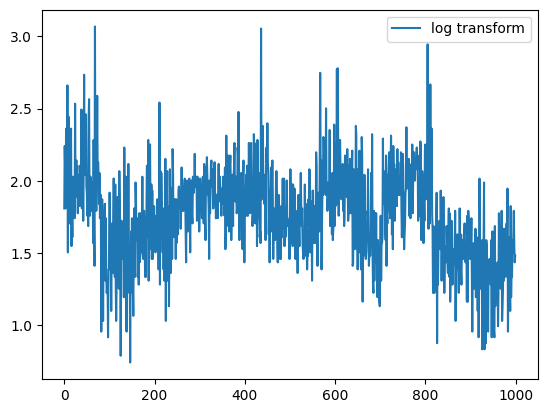

In [20]:
log_transform = np.log(data['Rate'])
plt.plot(log_transform[:1000],label="log transform")
plt.legend()
plt.show()

In [25]:
# power transform
transformed, lmbda = boxcox(df["Rate"])
plt.subplot(2, 1, 1)
plt.plot(df["Rate"], label='data')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(transformed, label='power-transformed')
plt.legend()
plt.show()

ValueError: Data must be positive.

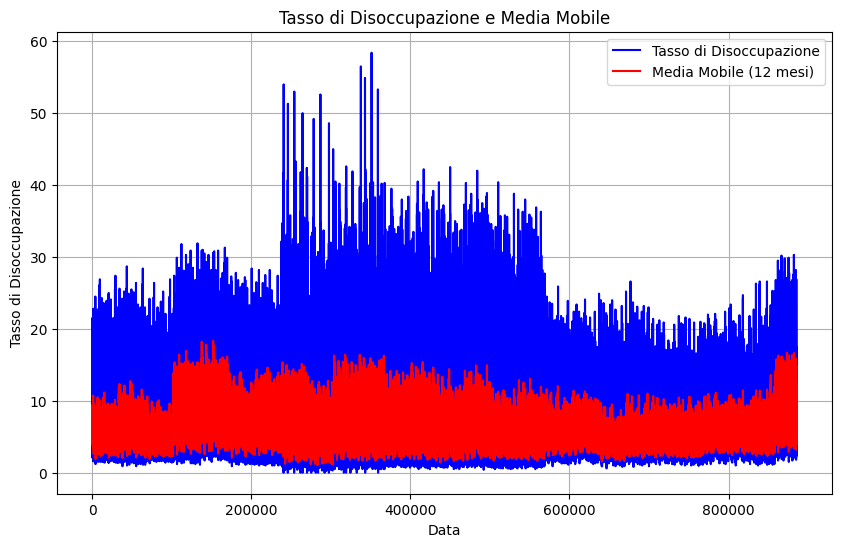

In [31]:
rolling_mean = data['Rate'].rolling(window=12).mean()

# Grafico dei tassi di disoccupazione e della media mobile
plt.figure(figsize=(10, 6))
plt.plot(data['Rate'], label='Tasso di Disoccupazione', color='blue')
plt.plot(rolling_mean, label='Media Mobile (12 mesi)', color='red')
plt.title('Tasso di Disoccupazione e Media Mobile')
plt.xlabel('Data')
plt.ylabel('Tasso di Disoccupazione')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
data, df
df_year_month_mean = data.groupby(['Year', 'Month'])['Rate'].mean()
df_year_month_mean.loc["Year", "1990"]

KeyError: ('Year', '1990')